# Data analysis with python

## Dataset Description
In this project I used a dataset named "vgchartz-2024", which contains video game sales from North America, Japan, the EU, Africa and the rest of the world for 64,016 titles released from 1971-2024, including information like critic's score, genre, console and more.

## Columns Description
img: URL slug for the box art at vgchartz.com
title: Game title
console: Console the game was released for
genre: Genre of the game
publisher: Publisher of the game
developer: Developer of the game
critic_score: Metacritic score (out of 10)
total_sales: Global sales of copies in millions
na_sales: North American sales of copies in millions
jp_sales: Japanese sales of copies in millions
pal_sales: European & African sales of copies in millions
other_sales: Rest of world sales of copies in millions
release_date: Date the game was released on
last_update: Date the data was last updated


In [1]:
# Import all needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

## Data Wrangling:
here, we load the CSV file and get familiar with dataframe, including its rows and columns.

In [2]:
# Load the dataframe
vg = pd.read_csv("vgchartz-2024.csv")

In [3]:
# print out the head of dataframe
vg.head(6)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN


In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [5]:
# check the rows and columns of this dataframe
vg.shape

(64016, 14)

## Date Cleaning:
Since a lot of the information in the samples is important and there are many null values in most of the columns, it is not practical to drop all samples that have null data. The only exceptions are the developer and release_date columns, which have 17 and 7051 null values, respectively. Therefore, I only removed rows that have NaN values in these two columns.

In [6]:
vg.dropna(subset=['developer'], inplace=True)
vg.dropna(subset=['release_date'], inplace=True)

# drop unuseful columns
vg.drop(columns=['img','last_update'], inplace=True)

In [7]:
# drop the duplicates
vg.drop_duplicates(inplace=True)

In [8]:
# Extract the year from release date
vg['release_date'] = pd.to_datetime(vg['release_date'], errors='coerce')
vg['release_year'] = vg['release_date'].dt.year.astype('Int64')

## Data Normalization:
I applied label encoding to convert categorical data into numerical data for two commonly used columns: console and genre.

In [9]:
encoder_c = LabelEncoder()
encoder_c.fit(vg['console'])
vg['console'] = encoder_c.transform(vg['console'])

encoder_g = LabelEncoder()
encoder_g.fit(vg['genre'])
vg['genre'] = encoder_g.transform(vg['genre'])

To conduct certain analyses, we require a dataframe that doesn't have any NaN values in the total sales column, but we also need to keep the original dataframe intact. To avoid losing any data, it's essential to have both dataframes. So, I created a new dataframe called "vg_sales" specifically for analyses related to total sales.

In [10]:
vg_sales = vg.dropna(subset=['total_sales'])

## Data Analysis:

**Q1: What are the most popular consoles of video games?**
The term "most popular" in this dataset refers to the highest total sales, which is why we calculate the sum for the total_sales column.

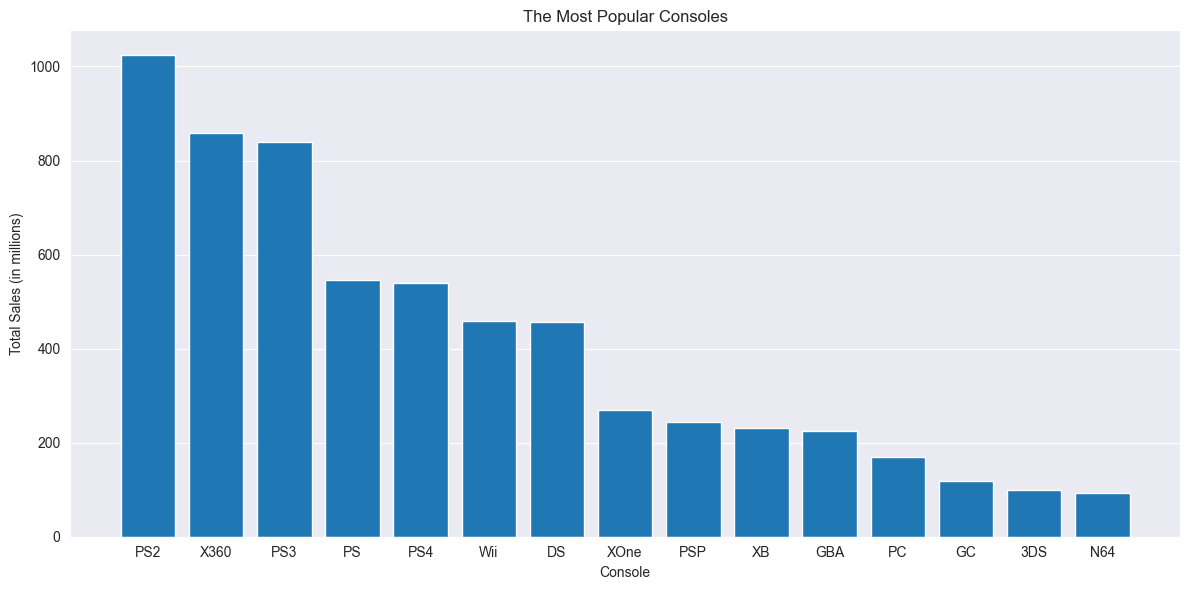

In [11]:
# Group by console, summing the total sales
popular_consoles = vg_sales.groupby('console')['total_sales'].sum().reset_index()
# Sort by total sales
popular_consoles =popular_consoles.sort_values('total_sales', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.bar(encoder_c.inverse_transform(popular_consoles['console']), popular_consoles['total_sales'])
plt.title('The Most Popular Consoles')
plt.xlabel('Console')
plt.ylabel('Total Sales (in millions)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Q2: What are the most popular genres in the video game industry?**

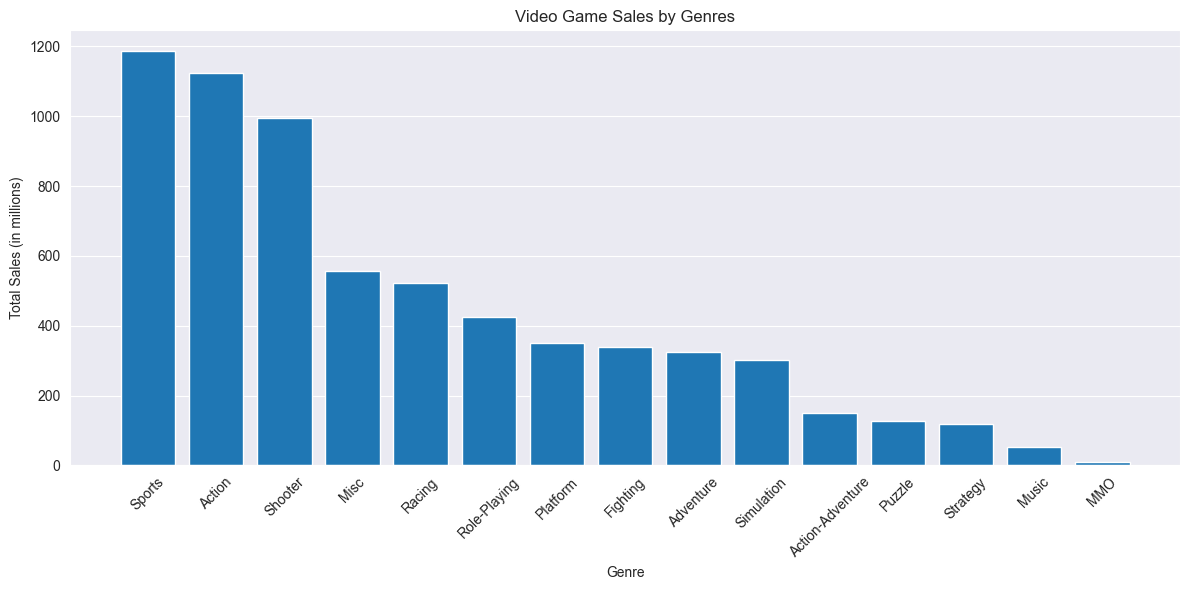

In [12]:
# Group by genre, summing the total sales
genre_sales = vg_sales.groupby('genre')['total_sales'].sum().reset_index()
# Sort by total sales
genre_sales = genre_sales.sort_values('total_sales', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.bar(encoder_g.inverse_transform(genre_sales['genre']), genre_sales['total_sales'])
plt.title('Video Game Sales by Genres')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.grid()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Q3: Which titles sold the most worldwide?**
To determine the most popular video games of all time, we need to arrange the titles based on their total sales. It's important to note that some games were released on multiple consoles, so to avoid confusion, it’s better to include the console name next to the title in the list.

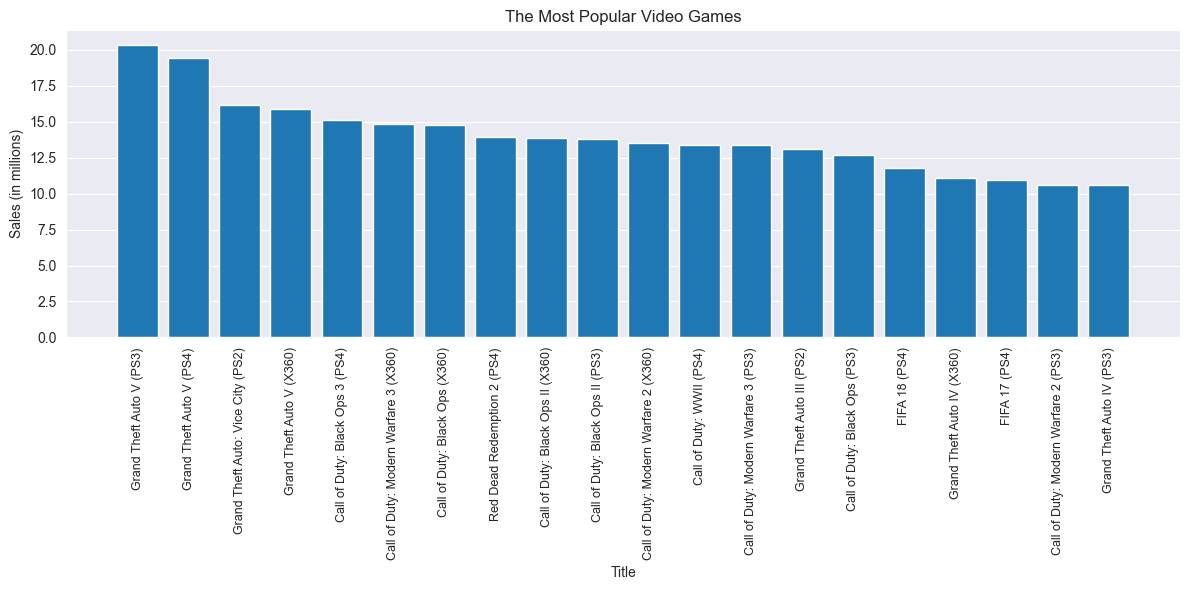

In [13]:
# Sort by total sales
popular_titles = vg_sales[['title', 'console', 'total_sales']].sort_values('total_sales', ascending=False).head(20)
# Add genre to title
popular_titles['title'] = popular_titles['title']+' ('+encoder_c.inverse_transform(popular_titles['console'])+')'

plt.figure(figsize=(12, 6))
plt.bar(popular_titles['title'], popular_titles['total_sales'])
plt.title('The Most Popular Video Games')
plt.xlabel('Title')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=90, fontsize=9)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Q4: Which year had the highest sales?**

    release_year  total_sales
31          2008       537.86
32          2009       495.36
33          2010       454.02
34          2011       440.32
30          2007       436.39


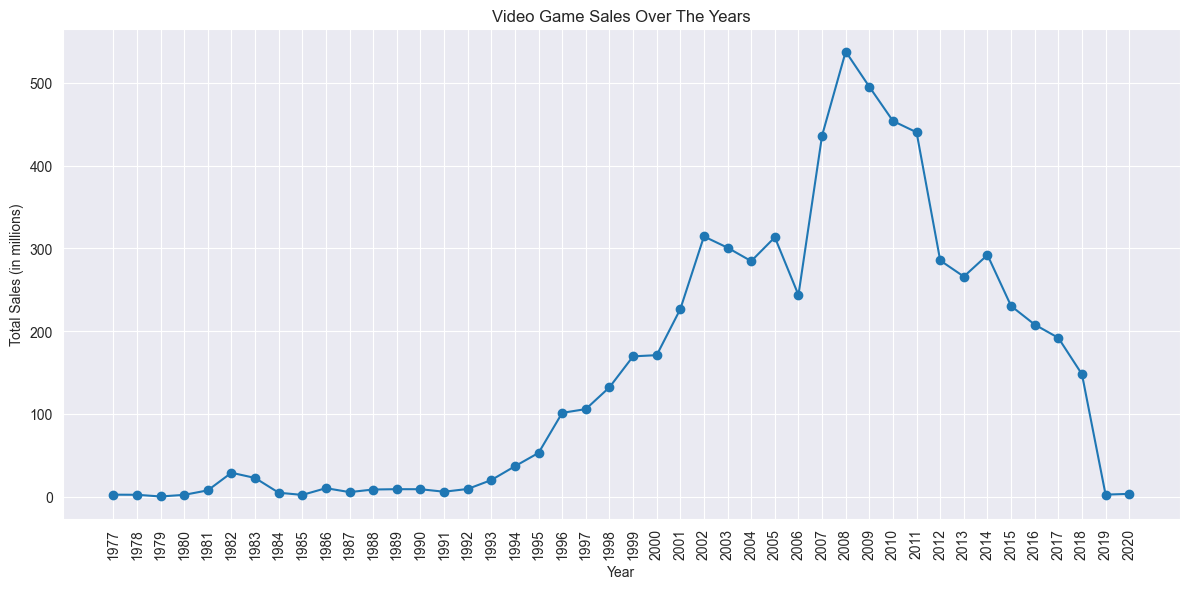

In [14]:
# Group by release year, summing the total sales
sales_trend = vg_sales.groupby('release_year')['total_sales'].sum().reset_index()

# Display 5 years with the highest total sales
print(sales_trend[['release_year','total_sales']].sort_values('total_sales', ascending=False).head(5))

plt.figure(figsize=(12, 6))
plt.plot(sales_trend['release_year'], sales_trend['total_sales'], marker='o')
plt.title('Video Game Sales Over The Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.xticks(sales_trend['release_year'], rotation=90)
plt.tight_layout()
plt.show()

**Q5: Has the industry grown over time?**
The visual above indicates that the video game industry has experienced growth, particularly between 1980 and 2008. To confirm this observation, we can utilize a correlation matrix to examine the relationships among various variables. This analysis will help us understand the connection between the year of release and sales figures. A positive correlation between "total_sales" and "release_year" would mean that the industry has expanded over time.

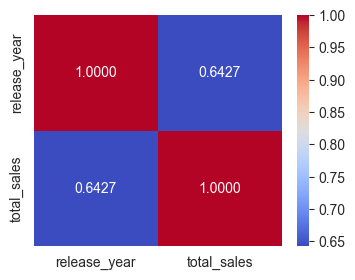

The video game industry has grown over time



In [15]:
cor = sales_trend.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(cor, cmap='coolwarm', annot=True, fmt=".4f")
plt.show()

# Display the result whether it has grown or not
if cor.iloc[0,1]>0.2:
    print("The video game industry has grown over time\n")
else:
    print("The video game industry hasn't grown over time\n")

**Q6: What has been the trend in video game sales across various regions over the years?**

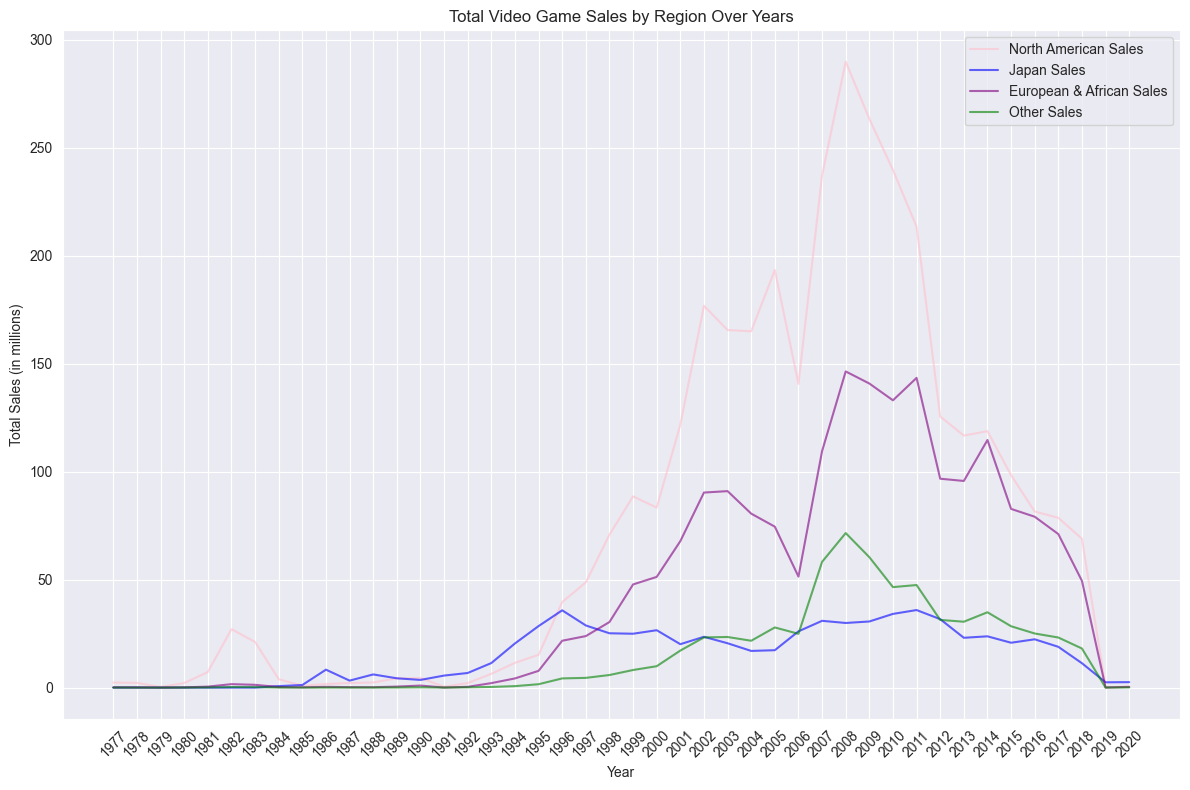

In [16]:
# Group by year, summing the sales for each region
annual_sales = vg_sales.groupby('release_year')[['na_sales','jp_sales','pal_sales','other_sales']].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(annual_sales['release_year'], annual_sales['na_sales'], color='pink', label='North American Sales', alpha=0.6)
plt.plot(annual_sales['release_year'], annual_sales['jp_sales'], color='blue', label='Japan Sales', alpha=0.6)
plt.plot(annual_sales['release_year'], annual_sales['pal_sales'], color='purple', label='European & African Sales', alpha=0.6)
plt.plot(annual_sales['release_year'], annual_sales['other_sales'], color='green', label='Other Sales', alpha=0.6)
plt.title('Total Video Game Sales by Region Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.xticks(annual_sales['release_year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Q7: Which regions have the highest total sales revenue?**

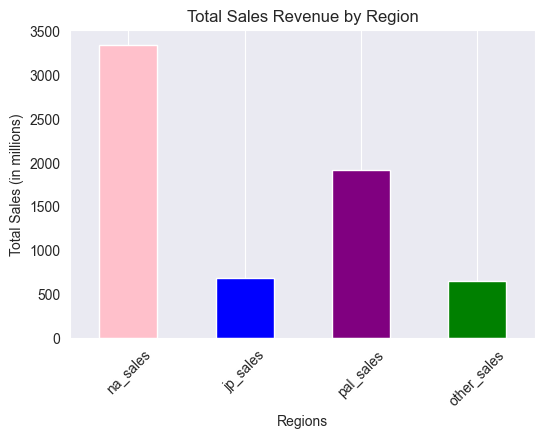

In [17]:
regional_total_sales = vg_sales[['na_sales','jp_sales','pal_sales','other_sales']].sum()

plt.figure(figsize=(6, 4))
regional_total_sales.plot(kind='bar', color=['pink','blue','purple','green'])
plt.title('Total Sales Revenue by Region')
plt.xlabel('Regions')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Q8: Do any consoles seem to specialize in a particular genre?**


Specialization of Consoles in Genres:
           genre max_sales
PS2       Sports    266.38
X360     Shooter    231.35
PS3       Action    191.51
PS4      Shooter    144.95
Wii         Misc     122.5
PS        Sports    115.91
XOne     Shooter     90.32
DS    Simulation     88.96
XB        Sports     54.22
GBA     Platform     53.19


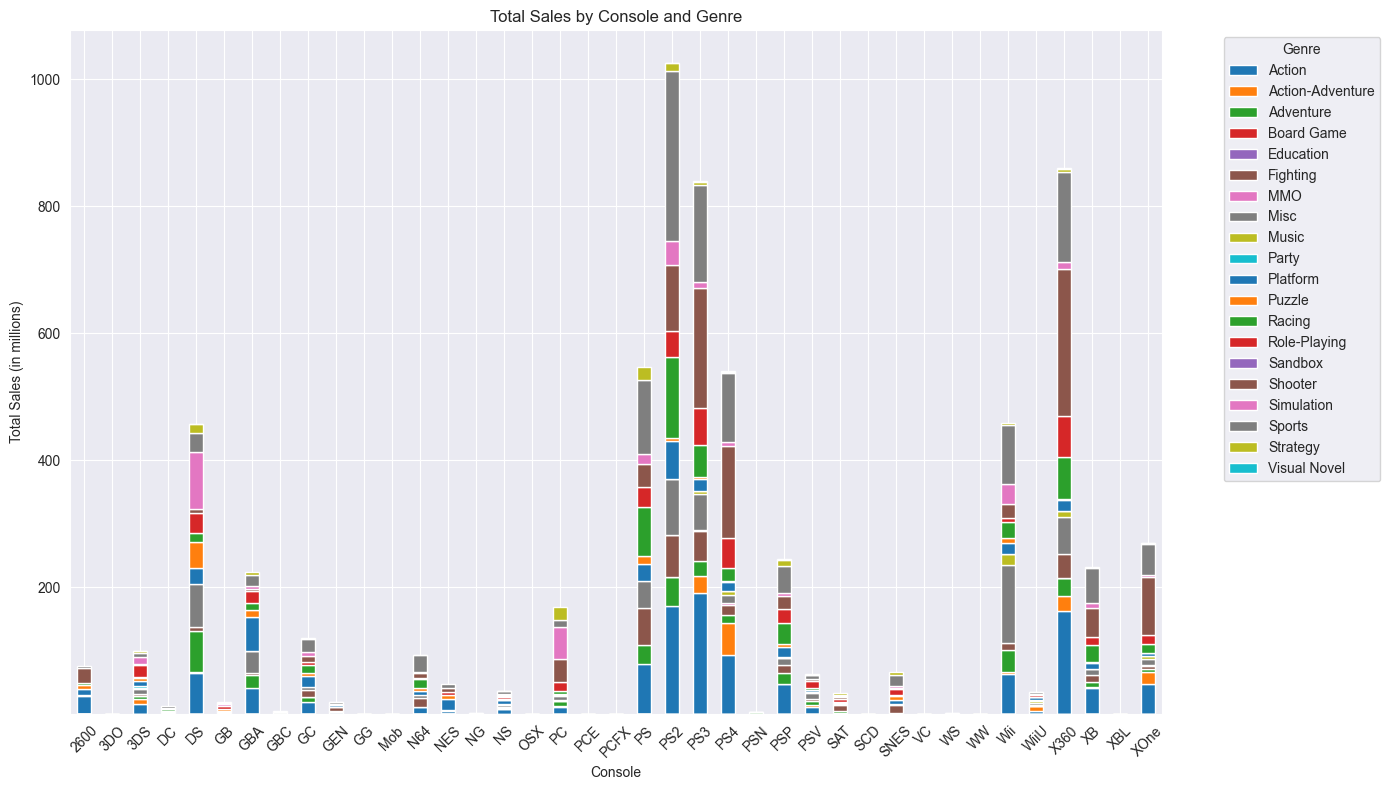

In [18]:
# Group by console and genre, summing the total sales
genre_console_sales = vg_sales.groupby(['console', 'genre'])['total_sales'].sum().reset_index()
genre_console_sales['console'] = encoder_c.inverse_transform(genre_console_sales['console'])
genre_console_sales['genre'] = encoder_g.inverse_transform(genre_console_sales['genre'])

# Create a dictionary to hold the max genre and its sales for each platform
specialization_dict = {}

# Iterate through each group of consoles
for console, group in genre_console_sales.groupby('console'):
    # Find the row with maximum sales
    max_sales_row = group.loc[group['total_sales'].idxmax()]
    specialization_dict[console] = {
        'genre': max_sales_row['genre'],
        'max_sales': max_sales_row['total_sales']
    }

# Display 10 consoles that specialize the most in a specific genre
specialization_df = pd.DataFrame(specialization_dict).T # Transpose index and columns
print("\nSpecialization of Consoles in Genres:")
print(specialization_df.sort_values('max_sales', ascending=False).head(10))

# Plot the total sales by genre and console
genre_sales = genre_console_sales.groupby(['console', 'genre'])['total_sales'].sum().unstack()
genre_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Sales by Console and Genre')
plt.xlabel('Console')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q9: What titles are popular in one region but flop in another?**
Numerous video games achieve significant popularity in certain regions while failing to resonate in others. I considered those with the biggest sales differences between at least two regions. Here, popularity means selling over 1 million copies, while a flop means selling less than 0.1 million.

C:\Users\Marin\AppData\Local\Temp\ipykernel_22288\2257499188.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_flop_titles['sales_difference'] = popular_flop_titles.apply(calculate_difference, axis=1)


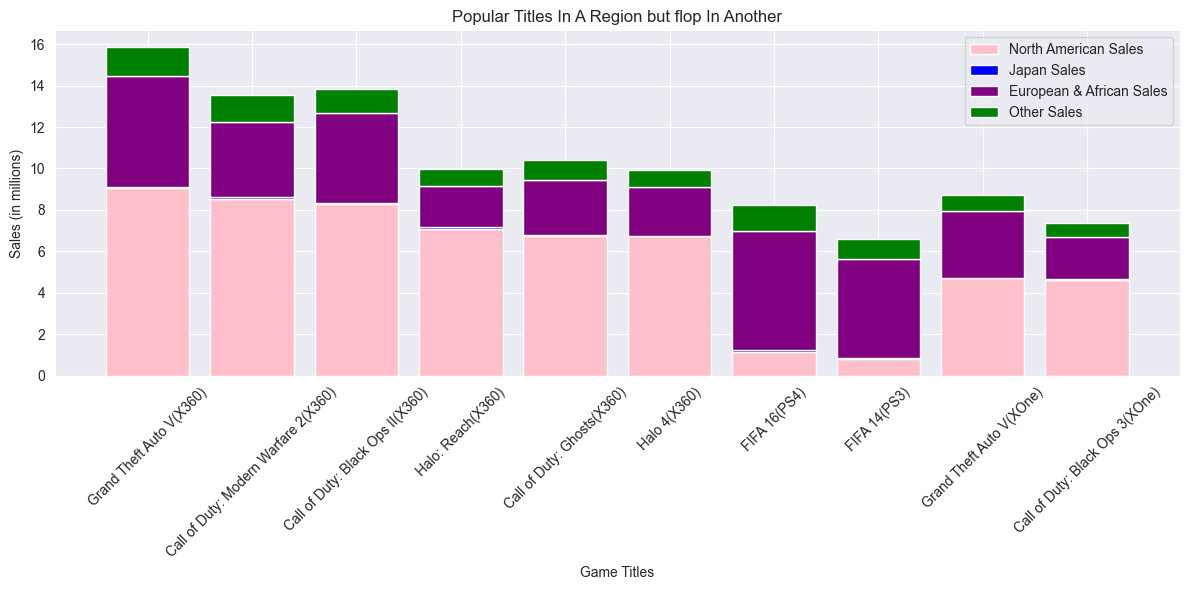

In [19]:
popular_threshold = 1.0     # Sales in millions for popularity
flop_threshold = 0.1        # Sales in millions for flop

# Function to calculate the difference between max and min sales for different regions
def calculate_difference(row):
    sales = [row['jp_sales'], row['na_sales'], row['pal_sales'], row['other_sales']]
    max_sales = max(sales)
    min_sales = min(sales)
    return max_sales - min_sales

# Filter titles that are popular in at least one region and flop in others
popular_flop_titles = vg_sales[
    ((vg_sales['jp_sales'] > popular_threshold) |
    (vg_sales['na_sales'] > popular_threshold) |
    (vg_sales['pal_sales'] > popular_threshold) |
    (vg_sales['other_sales'] > popular_threshold)) &
    ((vg_sales['jp_sales'] < flop_threshold) |
    (vg_sales['na_sales'] < flop_threshold) |
    (vg_sales['pal_sales'] < flop_threshold) |
    (vg_sales['other_sales'] < flop_threshold))
]
popular_flop_titles['sales_difference'] = popular_flop_titles.apply(calculate_difference, axis=1)

top_titles = popular_flop_titles.sort_values(by='sales_difference', ascending=False).head(10)
top_titles['title'] = top_titles['title'] + '(' + encoder_c.inverse_transform(top_titles['console']) + ')'

plt.figure(figsize=(12, 6))
plt.bar(top_titles['title'], top_titles['na_sales'], label='North American Sales', color='pink')
plt.bar(top_titles['title'], top_titles['jp_sales'], bottom=top_titles['na_sales'], label='Japan Sales', color='blue')
plt.bar(top_titles['title'], top_titles['pal_sales'], bottom=top_titles['na_sales'] + top_titles['jp_sales'], label='European & African Sales', color='purple')
plt.bar(top_titles['title'], top_titles['other_sales'], bottom=top_titles['na_sales'] + top_titles['jp_sales'] + top_titles['pal_sales'], label='Other Sales', color='green')
plt.xlabel('Game Titles')
plt.ylabel('Sales (in millions)')
plt.title('Popular Titles In A Region but flop In Another')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

We can notice from the above visual that the first six titles, along with the ninth and tenth, are really popular in North America, but they didn't sell well in Japan. On the other hand, the seventh and eighth titles are a hit in Europe and Africa, but they also flopped in Japan.

**Q10: Which data is out of range for total sales data?**
Outlier data typically falls outside the range of (mean + (standard_deviation * coefficient)) or (mean - (standard_deviation * coefficient)). In this sales dataset, the values are skewed towards 0, which means the upper coefficient needs to be greater than the lower coefficient. I decided to set the upper coefficient at 5.

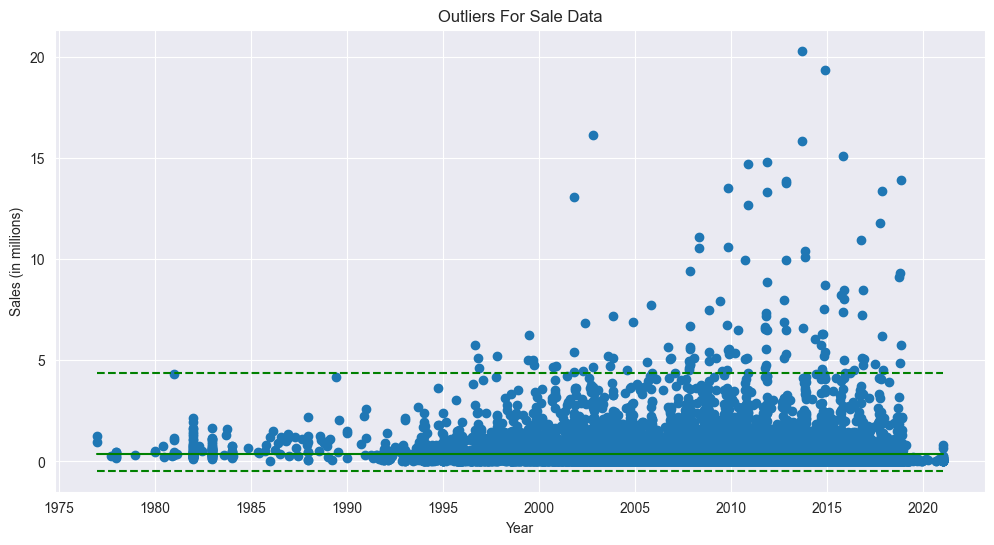

In [20]:
mean = vg_sales['total_sales'].mean()
date_min = vg_sales['release_date'].min()
date_max = vg_sales['release_date'].max()
std = np.std(vg_sales['total_sales'])
up_coef = 5
down_coef = 1

up_line = mean + std*up_coef
down_line = mean - std*down_coef

plt.figure(figsize=(12, 6))
plt.scatter(vg_sales['release_date'], vg_sales['total_sales'])
plt.plot([date_min, date_max], [mean, mean], 'g')
plt.plot([date_min, date_max], [up_line, up_line], 'g--')
plt.plot([date_min, date_max], [down_line, down_line], 'g--')
plt.title('Outliers For Sale Data')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.show()

**Q11: What is the count of titles that have data available in their release date column for each year?**

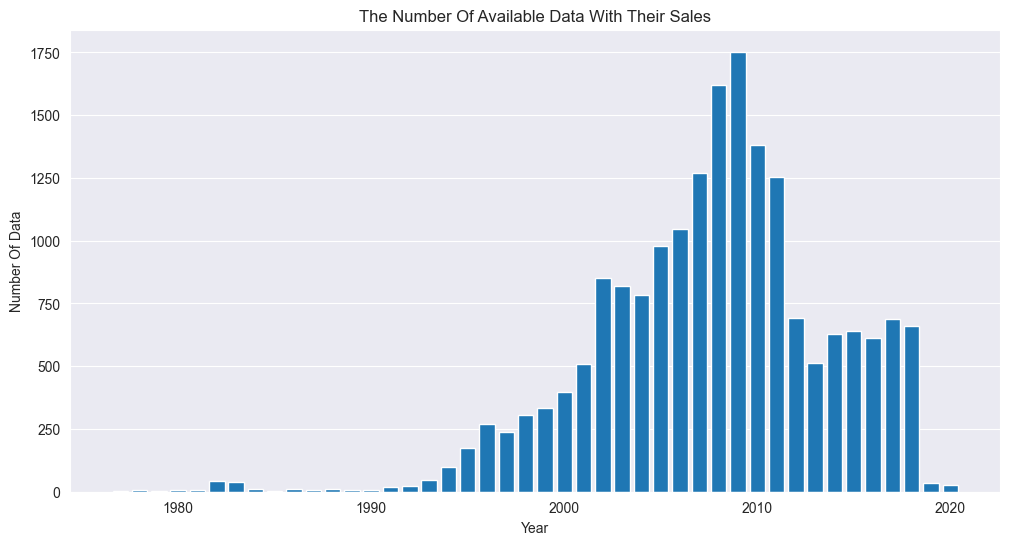

In [21]:
data_count = vg[['total_sales','release_year']].dropna().groupby('release_year').count()
data_count = data_count.sort_values('release_year', ascending=False).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(data_count['release_year'], data_count['total_sales'])
plt.title('The Number Of Available Data With Their Sales')
plt.xlabel('Year')
plt.ylabel('Number Of Data')
plt.grid(axis='x')
plt.show()

From what we can observe above, there haven't been any samples available since 2020, and the amount of data after 2009 has decreased. This could be a reason why total sales have declined since 2008.


**Pairplot:** To plot pairwise relationships within a dataset.

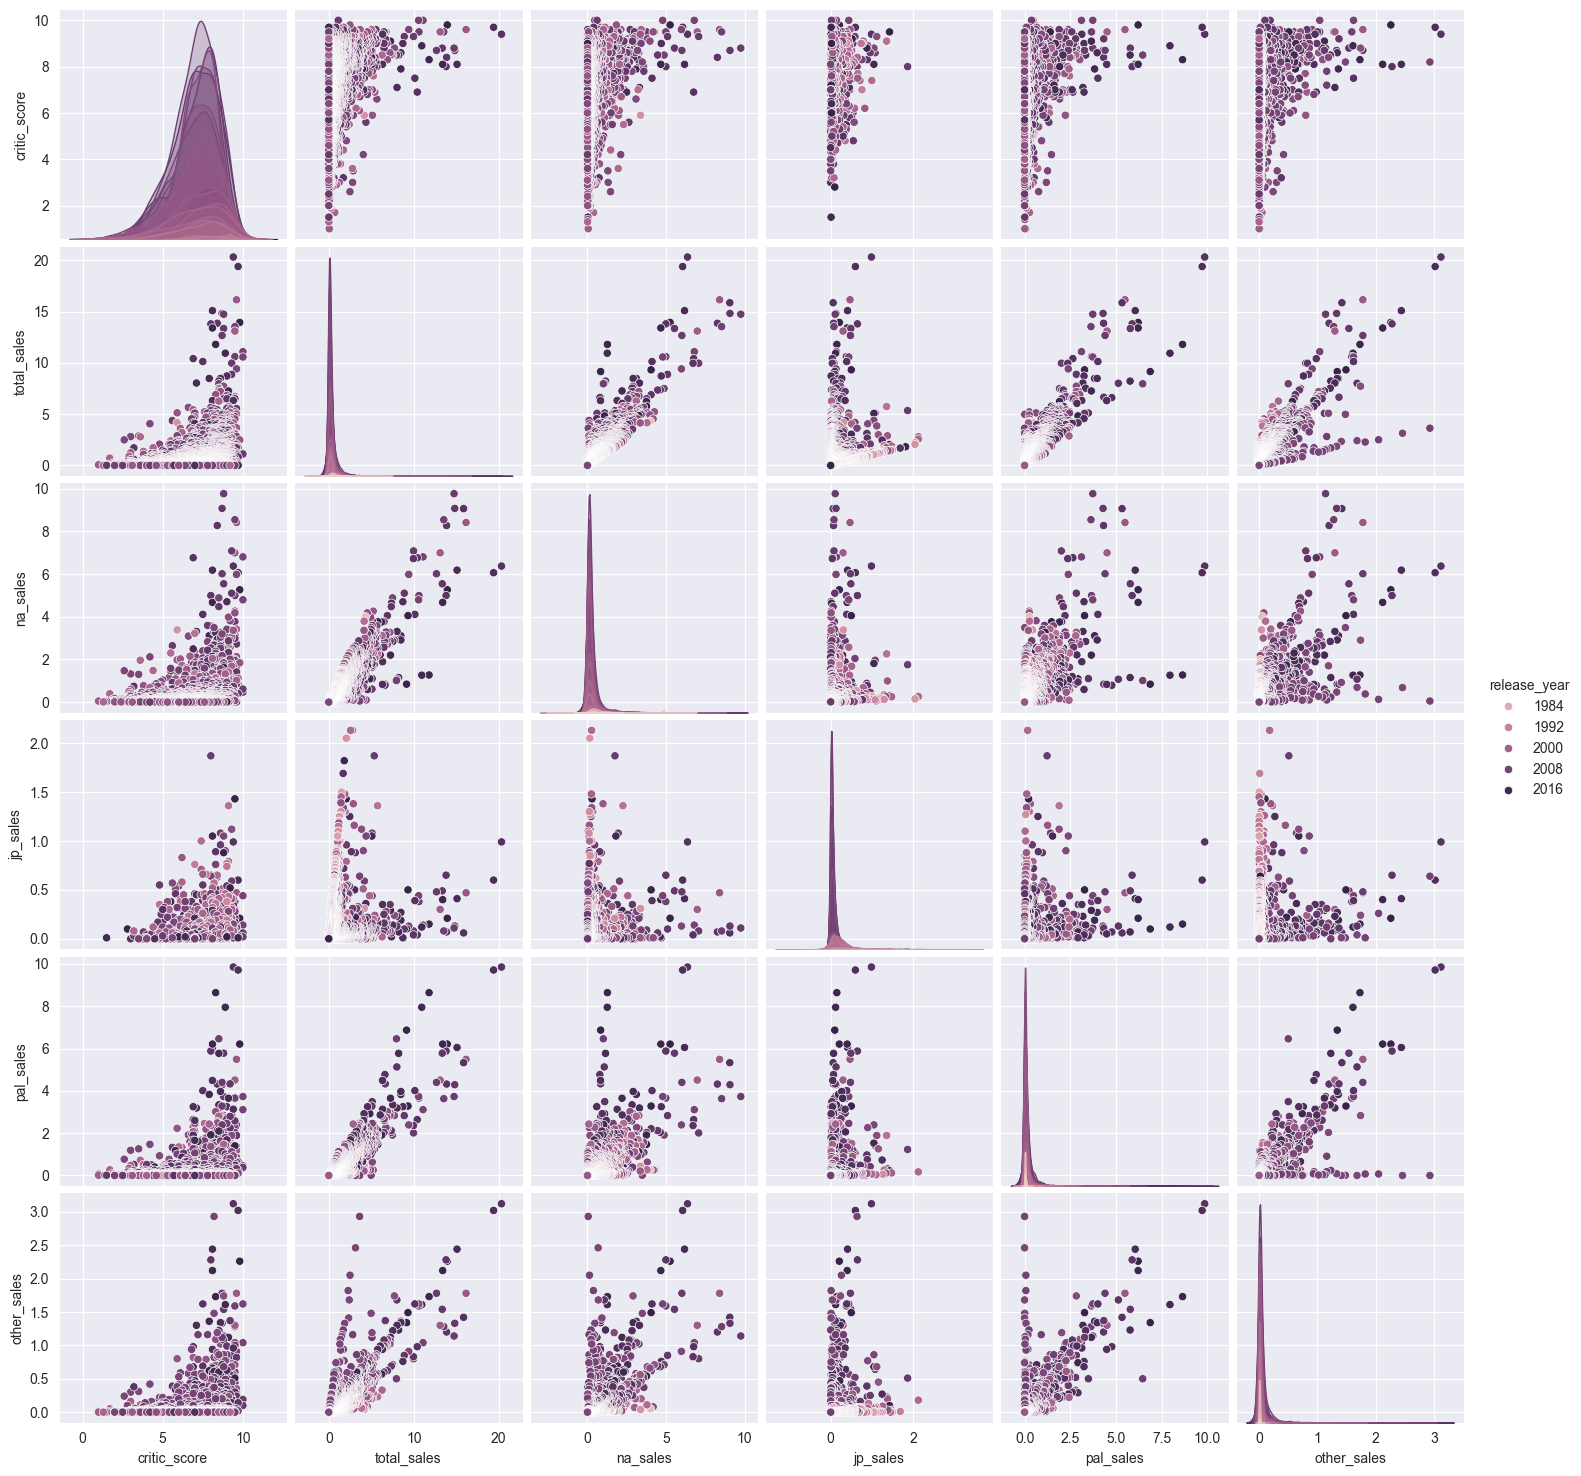

In [22]:
sns.pairplot(vg_sales.astype({'release_year': int}).drop(columns=['console','genre']), hue='release_year')

The default pairplot shows scatter plots between variables on the upper and lower triangle and histograms along the diagonal. Already, we can see some trends such as a positive correlation between critic_score and total_sales which shows that a high total score usually leads to a high critic score. We can also verify this using corr():

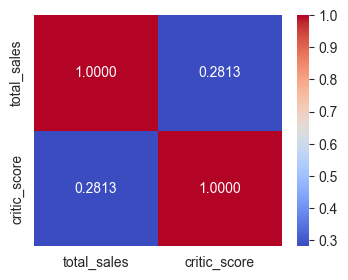

In [23]:
sales_score = vg_sales[['total_sales','critic_score']].dropna()

cor = sales_score.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(cor, cmap='coolwarm', annot=True, fmt=".4f")
plt.show()
